<a href="https://colab.research.google.com/github/pramodprajapatcse/-Data-science-and-Business-Analytics-tasks/blob/main/Exploratory_Data_Analysis_sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 5 - Exploratory Data Analysis - Sports

Objective:
* Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’
* As a sports analyst, find out the most successful teams, players and factors contributing win or loss of a team.
* Suggest teams or players a company should endorse for its products.


Author : Pramod Prajapat

Step 1 : Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 2 : Loading the data

In [2]:
matches=pd.read_csv('./matches.csv')
deliveries=pd.read_csv('./deliveries.csv')

In [3]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.shape

(756, 18)

In [5]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [6]:
deliveries.shape

(10330, 21)

Step 3 : Data Cleaning and Pre-processing

In [7]:
#Handling the missing values
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
#Handling missing Cities
matches[matches['city'].isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [11]:
#Replacing missing cities as "Delhi"
matches["city"] = matches["city"].fillna("Delhi")

In [12]:
#Dropping "umpire3" coloumn as it have many missing values
matches.drop(["umpire3"],axis=1,inplace=True)

In [13]:
#Dataset where umpire1 column has null values.
matches[matches['umpire1'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [14]:
#Dataset where umpire2 column has null values.
matches[matches['umpire2'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [15]:
#Replace all null values in umpire1 column with "Sundaram Ravi" and umpire2 column with "Virender Sharma".
matches.fillna({'umpire1':'Sundaram Ravi','umpire2':'Virender Sharma'},inplace=True)

In [16]:
#Dataset where 'winner' is not available
matches[matches['winner'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [17]:
#Dataset where 'player_of_match' is not available
matches[matches['player_of_match'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


In [18]:
#Replace all null values in 'winner' and 'player_of_match' column with 'no result'.
matches.fillna({'winner':'no result','player_of_match':'no result'},inplace=True)

In [19]:
#Now we have have no missing fields
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [20]:
matches.shape

(756, 17)

In [21]:
#Missing values in Deliveries
deliveries.isnull().sum()

match_id               0
inning                 0
batting_team           0
bowling_team           0
over                   1
ball                   1
batsman                1
non_striker            1
bowler                 1
is_super_over          1
wide_runs              1
bye_runs               1
legbye_runs            1
noball_runs            1
penalty_runs           1
batsman_runs           1
extra_runs             1
total_runs             1
player_dismissed    9807
dismissal_kind      9807
fielder             9970
dtype: int64

Step 4 : EDA on Matches

In [22]:
#Toss decision
toss_dec=matches['toss_decision'].value_counts()
toss_dec

field    463
bat      293
Name: toss_decision, dtype: int64

Text(0.5, 1.0, 'Toss Decison')

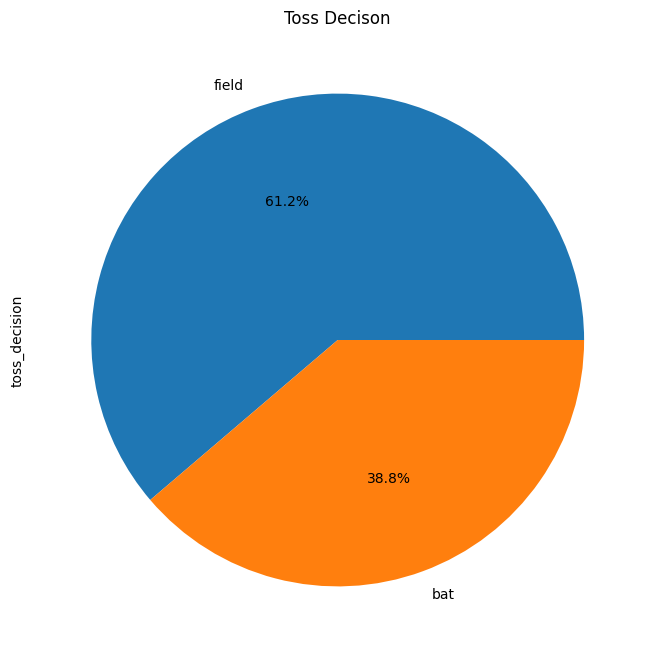

In [23]:
toss_dec.plot(kind='pie',figsize=[8,8],autopct='%0.1f%%')
plt.title('Toss Decison')

Observation: 61.2% of all toss decisions are for Fielding first

In [24]:
toss_dec_team=matches['toss_winner'].value_counts()
toss_dec_team

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

Text(0.5, 1.0, 'Team wise distribution showing winner of toss')

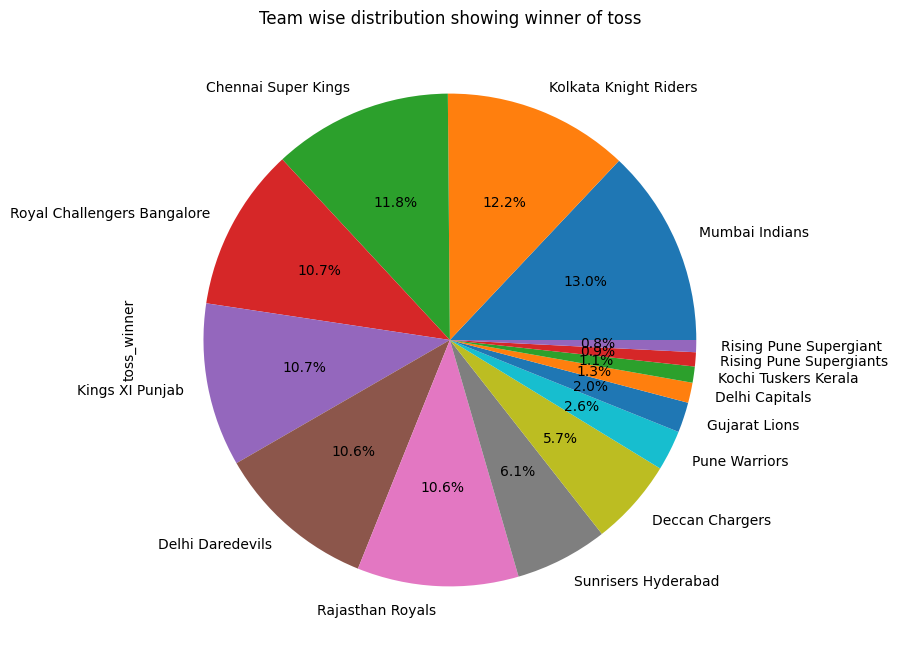

In [25]:
toss_dec_team.plot(kind="pie",figsize=[8,8],autopct='%0.1f%%')
plt.title('Team wise distribution showing winner of toss')

Observation: Mumbai Indians won the maximum no. of Toss.

In [26]:
#Number of times winner of match is the toss winner
toss_win_match_win=matches[matches['toss_winner']==matches['winner']][['winner']].value_counts()
toss_win_match_win

winner                     
Chennai Super Kings            57
Mumbai Indians                 56
Kolkata Knight Riders          53
Rajasthan Royals               42
Royal Challengers Bangalore    41
Delhi Daredevils               35
Kings XI Punjab                35
Sunrisers Hyderabad            23
Deccan Chargers                19
Gujarat Lions                  10
Delhi Capitals                  7
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Pune Warriors                   3
Rising Pune Supergiants         3
dtype: int64

Text(0.5, 1.0, 'Team wise distribution showing winner of match is the toss winner')

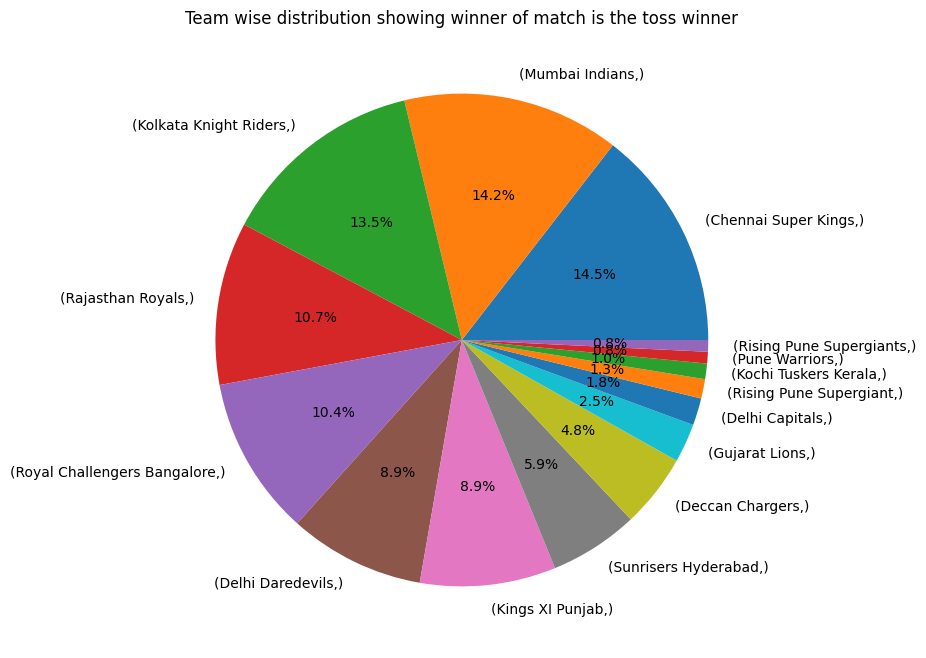

In [27]:
toss_win_match_win.plot(kind="pie",figsize=[8,8],autopct='%0.1f%%')
plt.title('Team wise distribution showing winner of match is the toss winner')

Observation: Chennai Super Kings converted most of its toss win to match win (14.5%)

In [28]:
#Batting first won the match
bat_first=matches[matches['win_by_runs']!=0]
bat_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Sundaram Ravi,Virender Sharma
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon


In [29]:
bat_first.value_counts().sum()

337

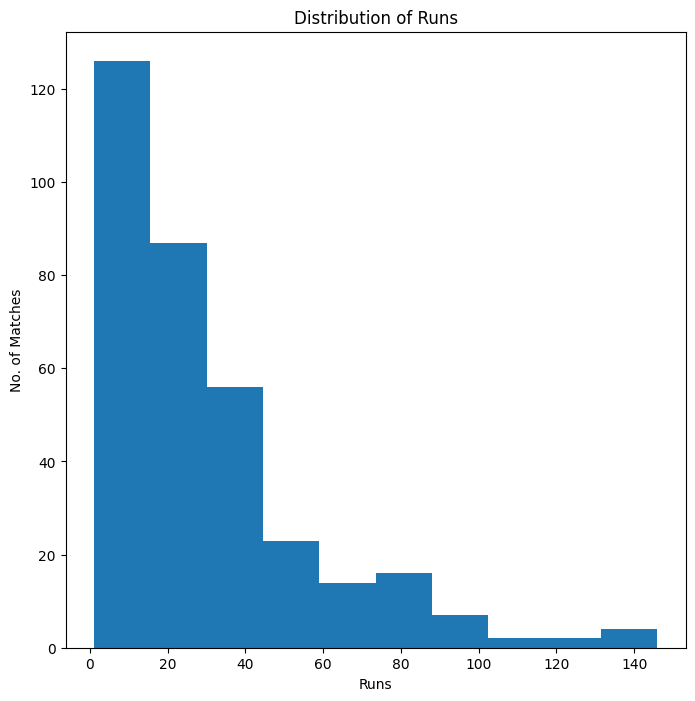

In [30]:
#Making Histogram of Distribution of runs
plt.figure(figsize=(8,8))
plt.hist(bat_first['win_by_runs'])
plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.ylabel('No. of Matches')
plt.show()

Observation: Most of the matches are won by short range of 1 to 10 runs.

In [31]:
bat_first_cnt=bat_first[['winner']].value_counts()
bat_first_cnt

winner                     
Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
dtype: int64

Text(0.5, 1.0, 'Winner by Batting First')

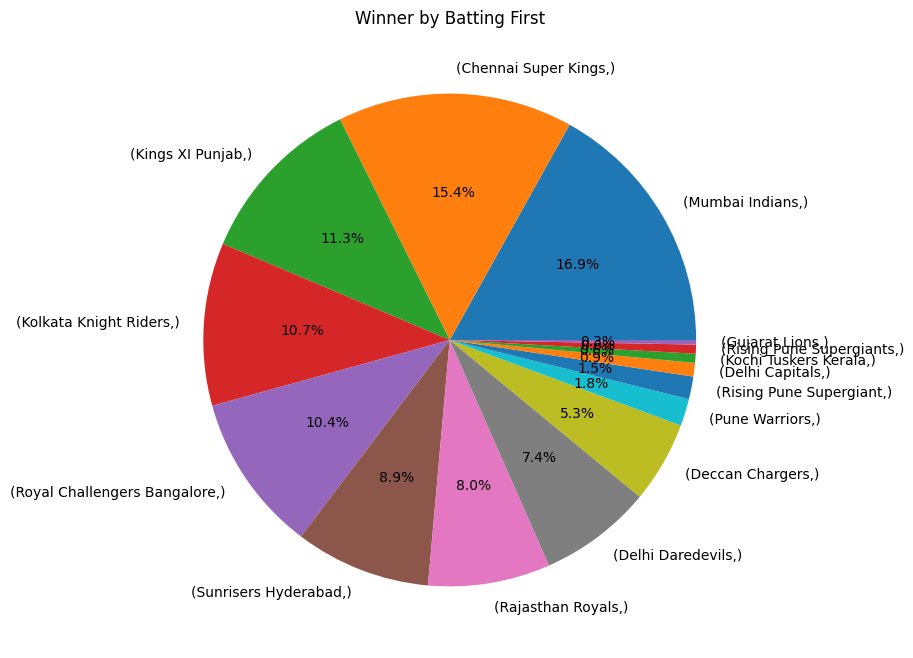

In [32]:
bat_first_cnt.plot(kind='pie',figsize=[8,8],autopct='%0.1f%%')
plt.title('Winner by Batting First')

Obsevation: Mumbai Indians won maximum matches among all other teams by Battiing first (16.9%)

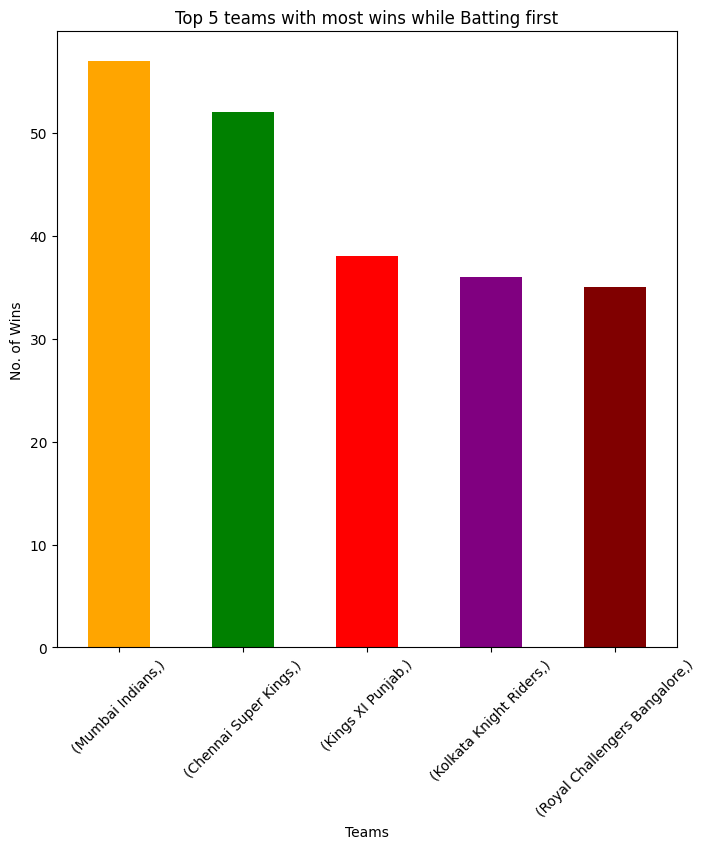

In [36]:
#Bar graph for top 5 teams
bat_first_cnt[0:5].plot(
    kind='bar',
    figsize=(8,8),
    color=["orange","green","red","purple","maroon"]
)
plt.title('Top 5 teams with most wins while Batting first')
plt.xlabel('Teams')
plt.xticks(rotation=45)
plt.ylabel('No. of Wins')
plt.show()

In [37]:
#Fielding First won the Match
field_first=matches[matches['win_by_wickets']!=0]
field_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan


In [38]:
field_first.value_counts().sum()

406

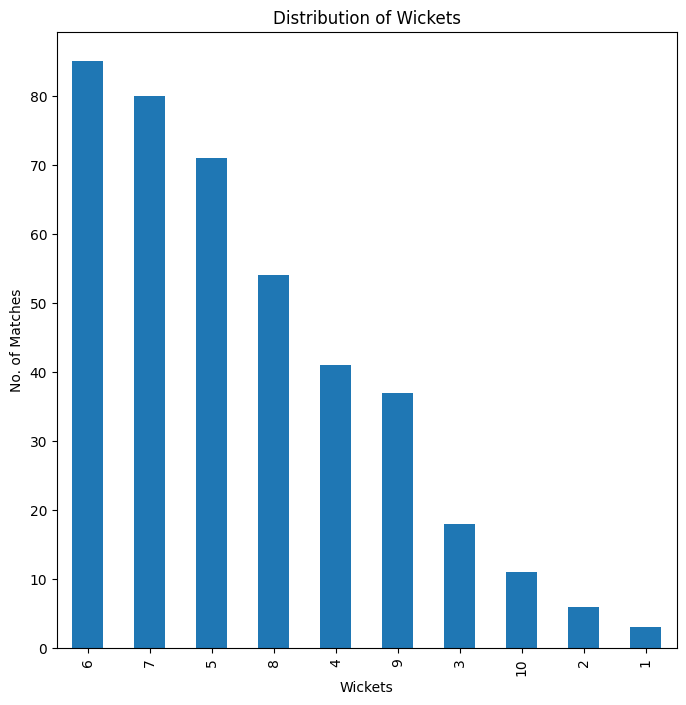

In [39]:
#Making bar graph of Distribution of runs
field_first.sort_values('win_by_wickets')['win_by_wickets'].value_counts().plot(kind='bar',figsize=(8,8))
plt.title('Distribution of Wickets')
plt.xlabel('Wickets')
plt.ylabel('No. of Matches')
plt.show()

Observation: Most of the matches are won by 6 wickets by Batting Second.

In [40]:
field_first_cnt=field_first[['winner']].value_counts()
field_first_cnt

winner                     
Kolkata Knight Riders          56
Mumbai Indians                 50
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Delhi Daredevils               42
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                  6
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
dtype: int64

Text(0.5, 1.0, 'Winner by Fielding First')

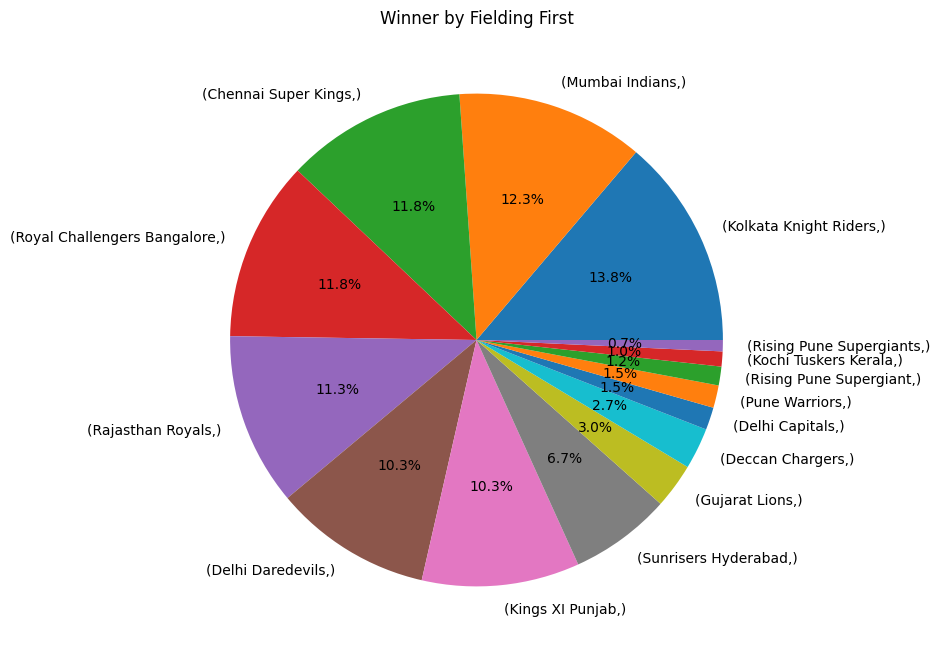

In [41]:
field_first_cnt.plot(kind='pie',figsize=[8,8],autopct='%0.1f%%')
plt.title('Winner by Fielding First')

Observation: KKR won max matches by fielding first (13.8%)

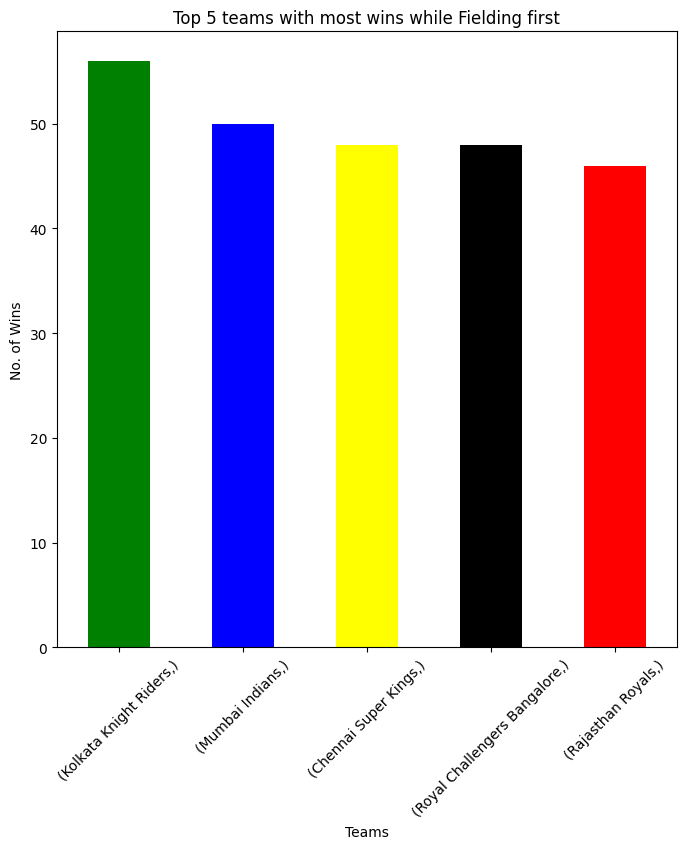

In [42]:
#Bar graph for top 5 teams
field_first_cnt[0:5].plot(
    kind='bar',
    figsize=(8,8),
    color=["green","blue","yellow","black","red"]
)
plt.title('Top 5 teams with most wins while Fielding first')
plt.xlabel('Teams')
plt.xticks(rotation=45)
plt.ylabel('No. of Wins')
plt.show()

In [43]:
#Player of the Match Analysis
top_players=matches['player_of_match'].value_counts()
top_players

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 227, dtype: int64

Text(0.5, 1.0, 'Top 10 Players according to being Player of the Match')

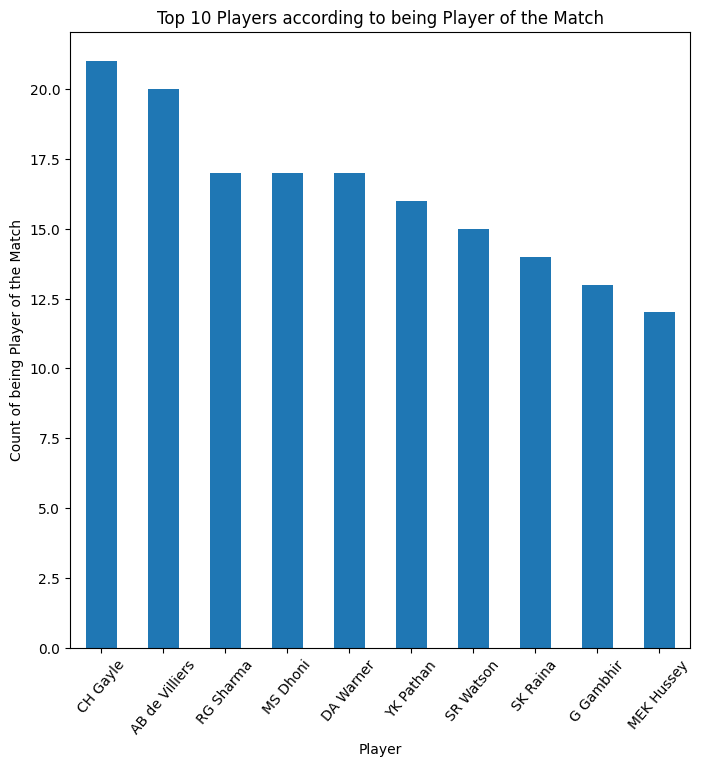

In [44]:
#Bar graph for Top 10 players
top_players.head(10).plot(kind='bar',figsize=(8,8))
plt.xlabel('Player')
plt.xticks(rotation=50)
plt.ylabel('Count of being Player of the Match')
plt.title('Top 10 Players according to being Player of the Match')

Observation: Gayle won max no. Player of the match award

In [45]:
#Analysing matches won by RCB if 'CH Gayle' was Player of the Match
gayle=matches[matches['player_of_match']=='CH Gayle'][['winner']]
gayle_cnt=gayle.value_counts()
gayle_cnt

winner                     
Royal Challengers Bangalore    17
Kings XI Punjab                 3
Kolkata Knight Riders           1
dtype: int64

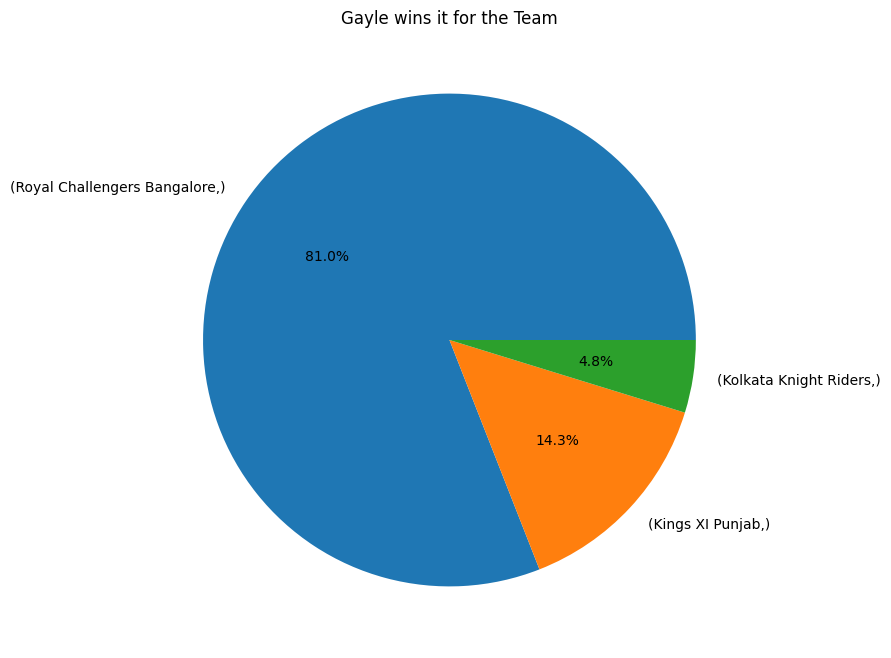

In [46]:
gayle_cnt.plot(kind='pie',figsize=[8,8],autopct='%0.1f%%')
plt.title('Gayle wins it for the Team')
plt.show()

In [47]:
#Analysing matches won by CSK if 'MS Dhoni' was Player of the Match
dhoni=matches[matches['player_of_match']=='MS Dhoni'][['winner']]
dhoni_cnt=dhoni.value_counts()
dhoni_cnt

winner                 
Chennai Super Kings        15
Rising Pune Supergiant      1
Rising Pune Supergiants     1
dtype: int64

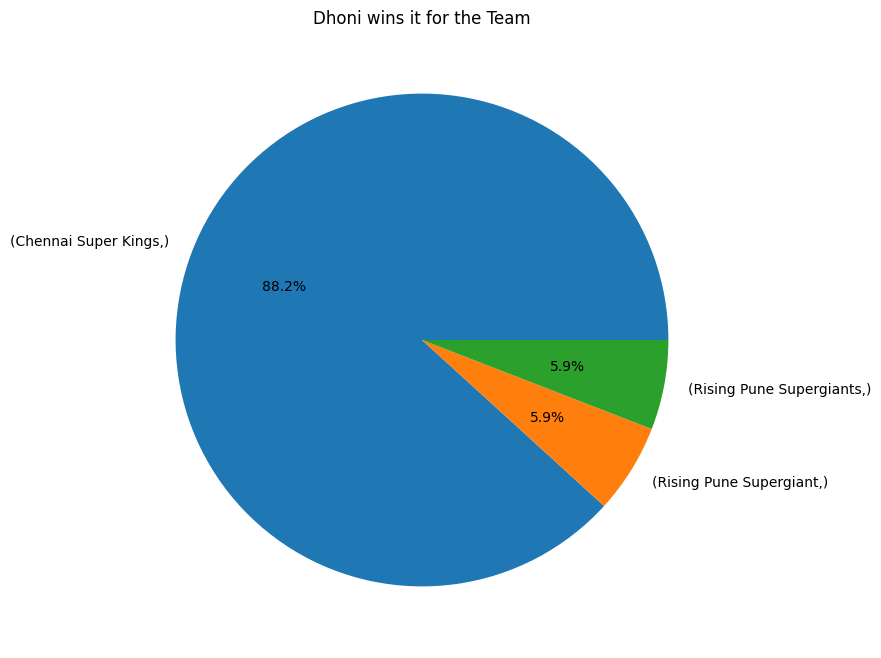

In [48]:
dhoni_cnt.plot(kind='pie',figsize=[8,8],autopct='%0.1f%%')
plt.title('Dhoni wins it for the Team')
plt.show()

In [49]:
#No. of wins per teams
no_wins=matches['winner'].value_counts()
no_wins

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
no result                        4
Name: winner, dtype: int64

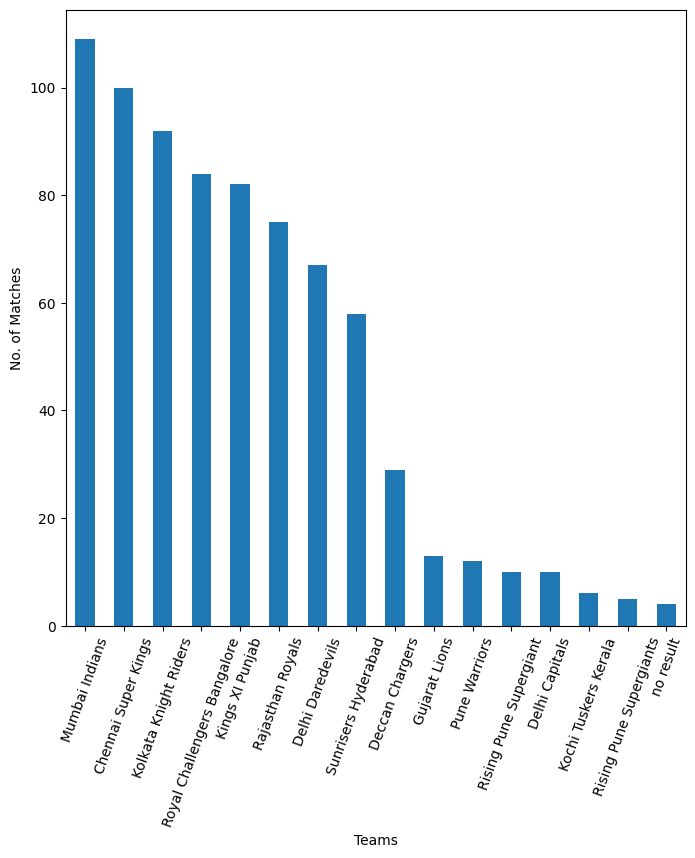

In [50]:
#Bar plot for no of Wins
no_wins.plot(kind='bar',figsize=(8,8))
plt.xlabel('Teams')
plt.xticks(rotation=70)
plt.ylabel('No. of Matches')
plt.show()

Observation: Mumbai Indians won max no matches followed by CSK

In [51]:
#Season Winners
final_matches=matches.drop_duplicates(subset=['season'], keep='last')
final_matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford


In [52]:
season_finalist=final_matches[['season','team1','team2']].reset_index(drop=True).sort_values('season')
season_finalist

,season,team1,team2
1,2008,Chennai Super Kings,Rajasthan Royals
2,2009,Deccan Chargers,Royal Challengers Bangalore
3,2010,Chennai Super Kings,Mumbai Indians
4,2011,Chennai Super Kings,Royal Challengers Bangalore
5,2012,Chennai Super Kings,Kolkata Knight Riders
6,2013,Mumbai Indians,Chennai Super Kings
7,2014,Kings XI Punjab,Kolkata Knight Riders
8,2015,Mumbai Indians,Chennai Super Kings
9,2016,Sunrisers Hyderabad,Royal Challengers Bangalore
0,2017,Mumbai Indians,Rising Pune Supergiant


In [53]:
final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [54]:
season_win=final_matches['winner'].value_counts()
season_win

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

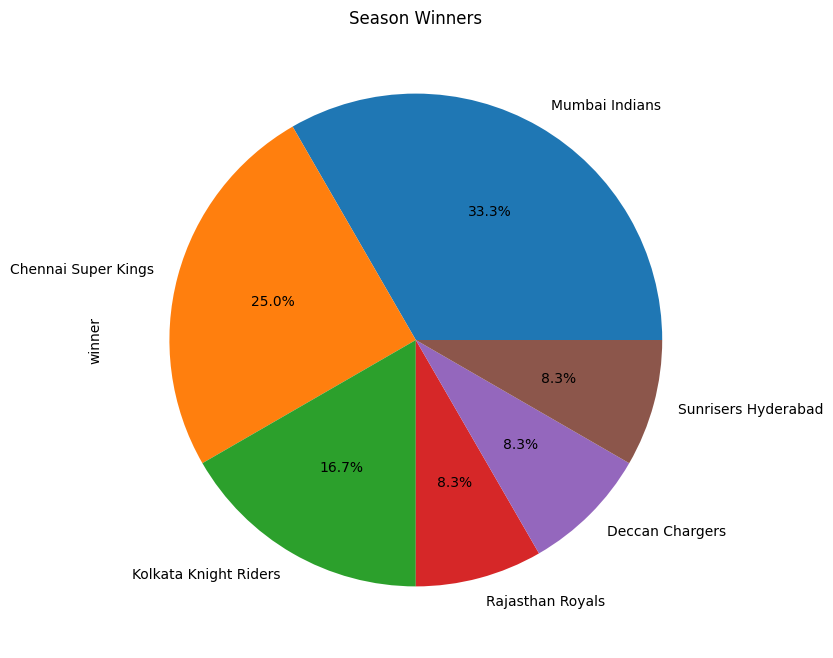

In [55]:
season_win.plot(kind='pie',figsize=[8,8],autopct='%0.1f%%')
plt.title('Season Winners')
plt.show()

Observation: Mumbai Indians have won max titles till 2019

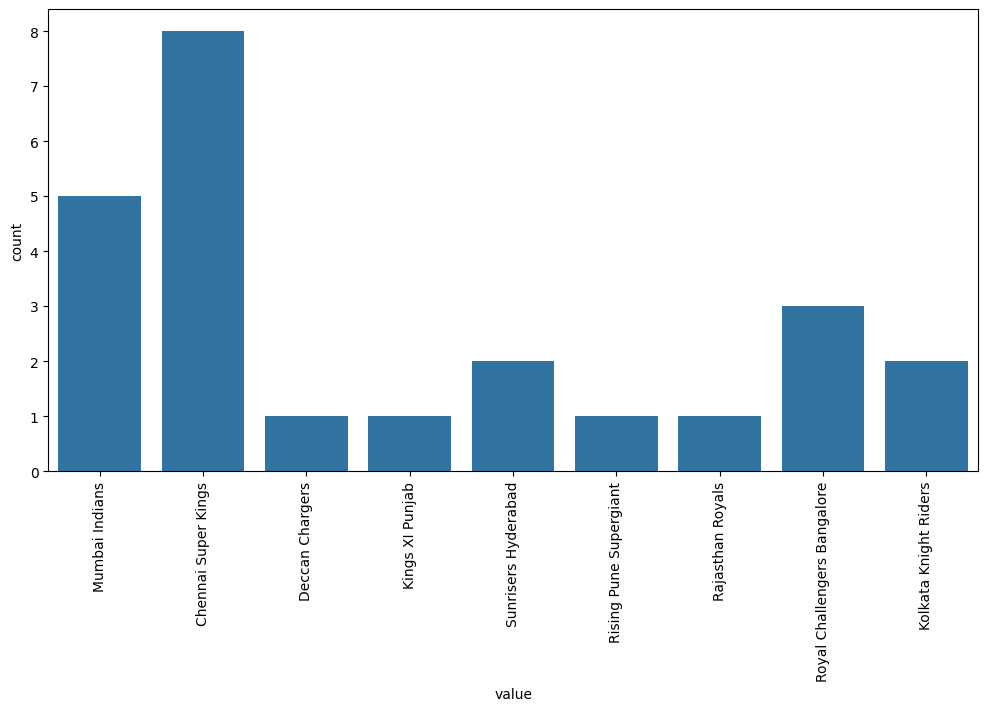

In [56]:
finalists = pd.melt(final_matches, id_vars=['id','season'], value_vars=['team1', 'team2'])
plt.figure(figsize=(12,6))
sns.countplot(x='value', data=finalists)
plt.xticks(rotation='vertical')
plt.show()

In [57]:
finalists_cnt=finalists['value'].value_counts()
finalists_cnt

Chennai Super Kings            8
Mumbai Indians                 5
Royal Challengers Bangalore    3
Sunrisers Hyderabad            2
Kolkata Knight Riders          2
Deccan Chargers                1
Kings XI Punjab                1
Rising Pune Supergiant         1
Rajasthan Royals               1
Name: value, dtype: int64

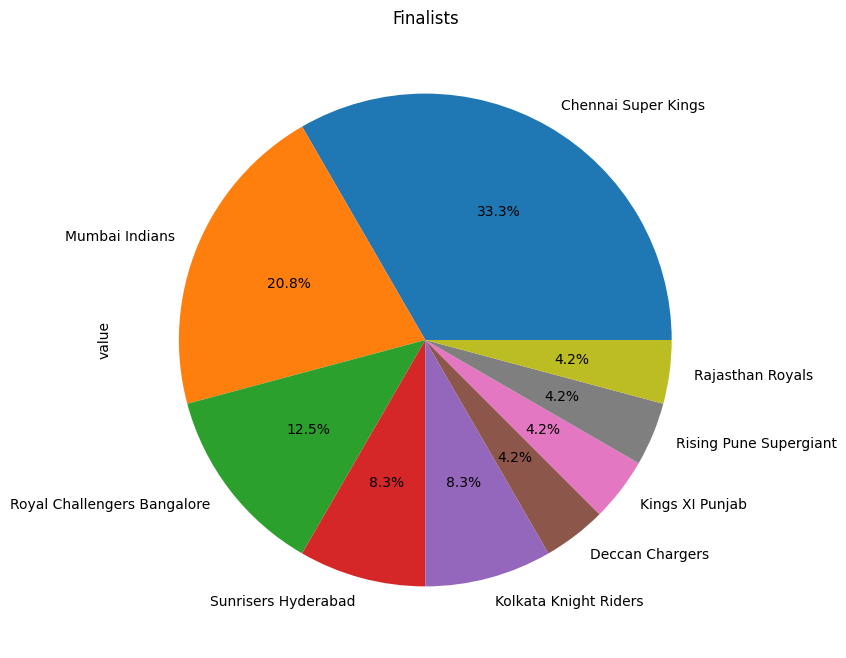

In [58]:
finalists_cnt.plot(kind='pie',figsize=[8,8],autopct='%0.1f%%')
plt.title('Finalists')
plt.show()

Observation: CSK reached finals max no. of times (33.3%)

In [59]:
#City analysis
city=matches['city'].value_counts()
city

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Ahmedabad          12
Centurion          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Ranchi              7
Abu Dhabi           7
Cuttack             7
Dubai               7
Port Elizabeth      7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

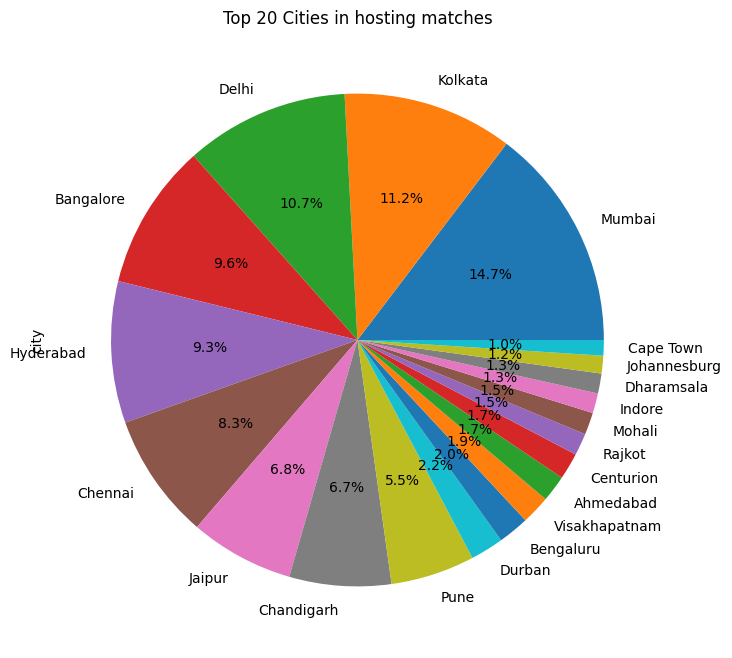

In [60]:
#Top 20 cities
city.head(20).plot(kind='pie',figsize=[8,8],autopct='%0.1f%%')
plt.title('Top 20 Cities in hosting matches')
plt.show()

Observation: Mumbai hosted max no. of matches

Conclusion of Matches

* 61.2% of all toss decisions are for Fielding first
* Max toss are won by Mumbai Indians (13.0%)
* CSK won max of its matches after also winninig the toss (14.5%)
* Mumbai won max matches by batting first (16.9%)
* KKR won max matches by batting second (13.8%)
* Mumbai won max titles followed by CSK till 2019
* CSK reached finals max no. of times (33.3%)
* Mumbai hosted max no. of Matches
* Gayle won max no. of Player of the Match
* Max matches are won by 0-10 runs by batting first
* Max matches are won by 6 wickets by batting second

Step 5 : EDA on Deliveries

* Boundaries

In [61]:
#No of Boundaries
fours=deliveries[deliveries['batsman_runs']==4]
fours_data=fours.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])
fours_data

,runs by fours,fours
batting_team,,
Delhi Daredevils,556.0,139
Gujarat Lions,664.0,166
Kings XI Punjab,556.0,139
Kolkata Knight Riders,712.0,178
Mumbai Indians,600.0,150
Rising Pune Supergiant,644.0,161
Royal Challengers Bangalore,444.0,111
Sunrisers Hyderabad,700.0,175


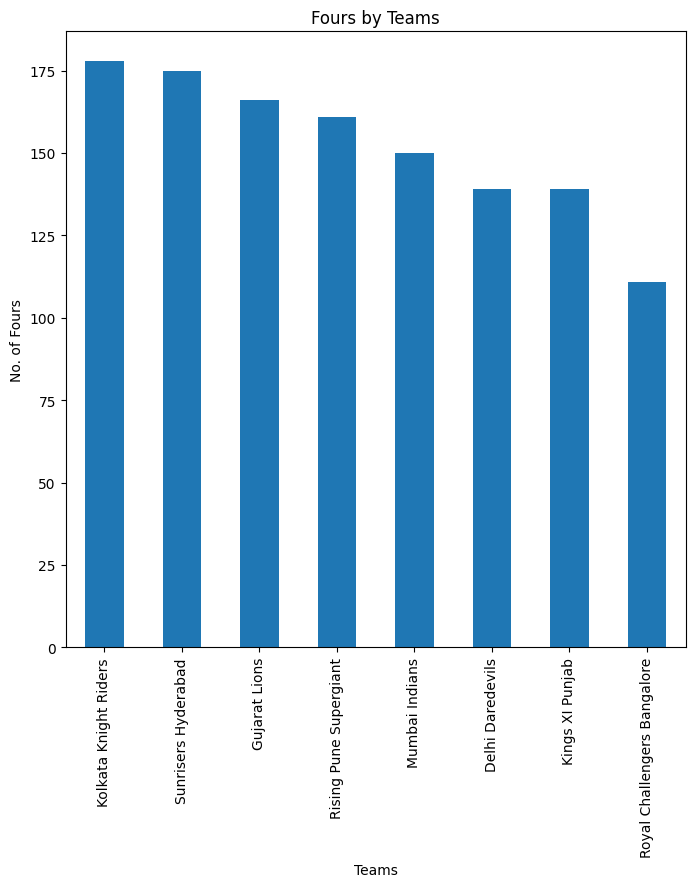

In [62]:
fours_data.sort_values('fours',ascending=False)['fours'].plot(kind='bar',figsize=(8,8))
plt.xlabel('Teams')
plt.ylabel('No. of Fours')
plt.title('Fours by Teams')
plt.show()

Observation: Mumbai Indians, Kings XI Punjab and KKR are top fours scorers

In [63]:
sixes=deliveries[deliveries['batsman_runs']==6]
sixes_data=sixes.groupby('batting_team')['batsman_runs'].agg([('runs by sixes','sum'),('sixes','count')])
sixes_data

,runs by sixes,sixes
batting_team,,
Delhi Daredevils,408.0,68
Gujarat Lions,444.0,74
Kings XI Punjab,372.0,62
Kolkata Knight Riders,360.0,60
Mumbai Indians,498.0,83
Rising Pune Supergiant,426.0,71
Royal Challengers Bangalore,372.0,62
Sunrisers Hyderabad,378.0,63


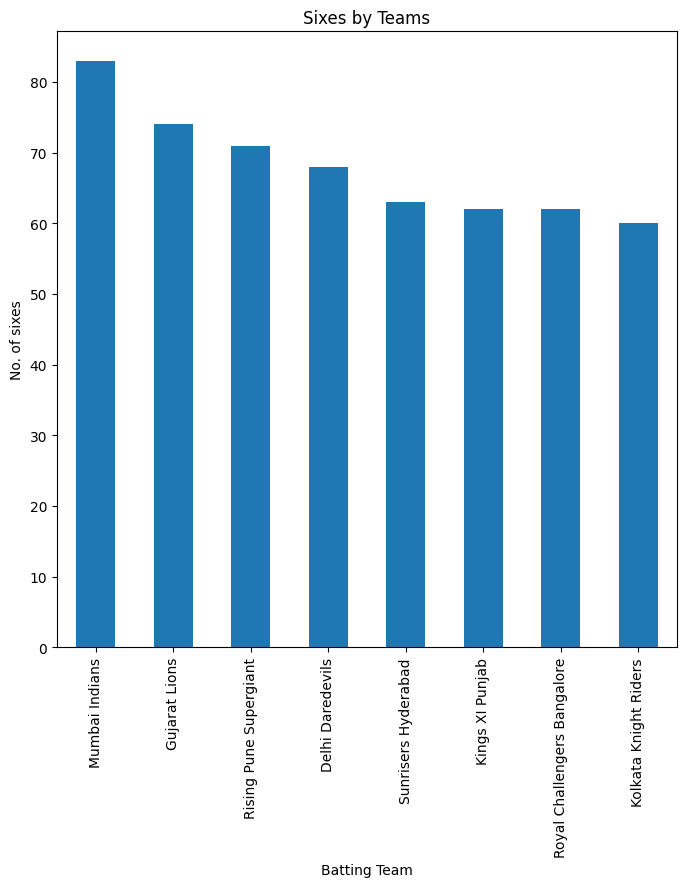

In [64]:
sixes_data.sort_values('sixes',ascending=False)['sixes'].plot(kind='bar',figsize=(8,8))
plt.xlabel('Batting Team')
plt.ylabel('No. of sixes')
plt.title('Sixes by Teams')
plt.show()

Observation: RCB,MI and Kings XI Punjab are top six scorers

In [65]:
fours_bat=deliveries[deliveries['batsman_runs']==4]
fours_data_bat=fours_bat.groupby('batsman')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])
fours_data_bat.sort_values('fours',ascending=False)

,runs by fours,fours
batsman,,
G Gambhir,220.0,55
DA Warner,204.0,51
S Dhawan,176.0,44
RA Tripathi,152.0,38
SK Raina,148.0,37
...,...,...
A Zampa,4.0,1
AB Dinda,4.0,1
Vishnu Vinod,4.0,1


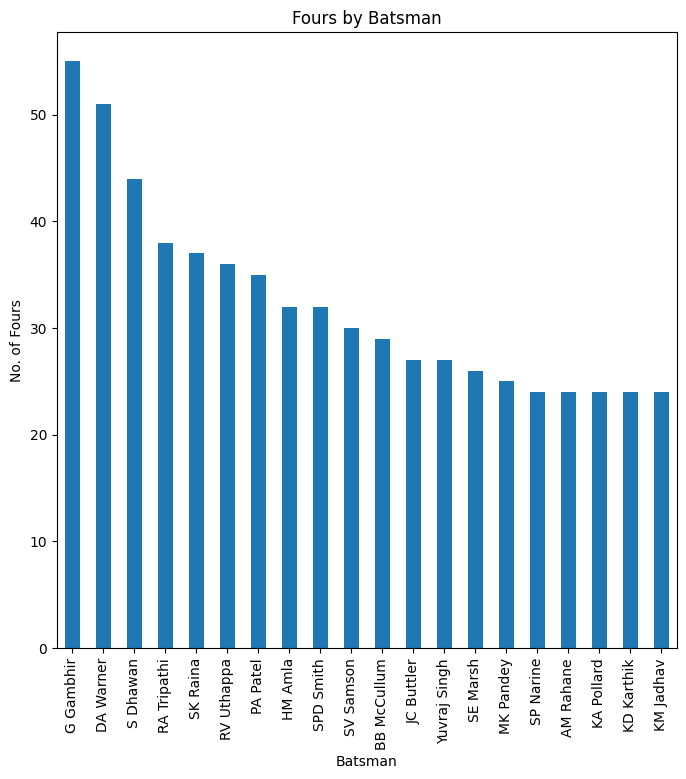

In [66]:
fours_data_bat.sort_values('fours',ascending=False)['fours'].head(20).plot(kind='bar',figsize=(8,8))
plt.xlabel('Batsman')
plt.ylabel('No. of Fours')
plt.title('Fours by Batsman')
plt.show()

Observation: Shikhar Dhawan hit the max no of Fours

In [67]:
sixes_bat=deliveries[deliveries['batsman_runs']==6]
sixes_data_bat=sixes_bat.groupby('batsman')['batsman_runs'].agg([('runs by sixes','sum'),('sixes','count')])
sixes_data_bat.sort_values('sixes',ascending=False)

,runs by sixes,sixes
batsman,,
DA Warner,144.0,24
RV Uthappa,126.0,21
RR Pant,120.0,20
SV Samson,114.0,19
BB McCullum,108.0,18
...,...,...
Basil Thampi,6.0,1
Ankit Soni,6.0,1
Ankit Sharma,6.0,1


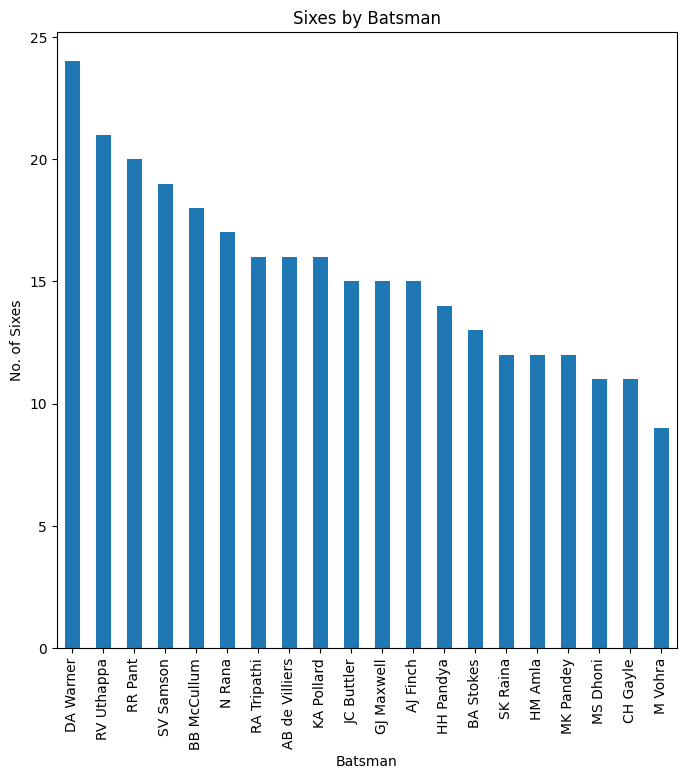

In [68]:
sixes_data_bat.sort_values('sixes',ascending=False)['sixes'].head(20).plot(kind='bar',figsize=(8,8))
plt.xlabel('Batsman')
plt.ylabel('No. of Sixes')
plt.title('Sixes by Batsman')
plt.show()

Observation: Gayle hit the max no. of sixes

* Runs Analysis

In [69]:
#Maximum Run scrores
runs=deliveries[deliveries['batsman_runs']>0]
runs=runs.groupby('batsman')['batsman_runs'].agg([('Runs','sum')])
runs.sort_values('Runs').sort_values('Runs',ascending=False)

,Runs
batsman,
DA Warner,529.0
G Gambhir,411.0
SK Raina,395.0
S Dhawan,388.0
RV Uthappa,384.0
...,...
DS Kulkarni,1.0
LH Ferguson,1.0
CR Brathwaite,1.0


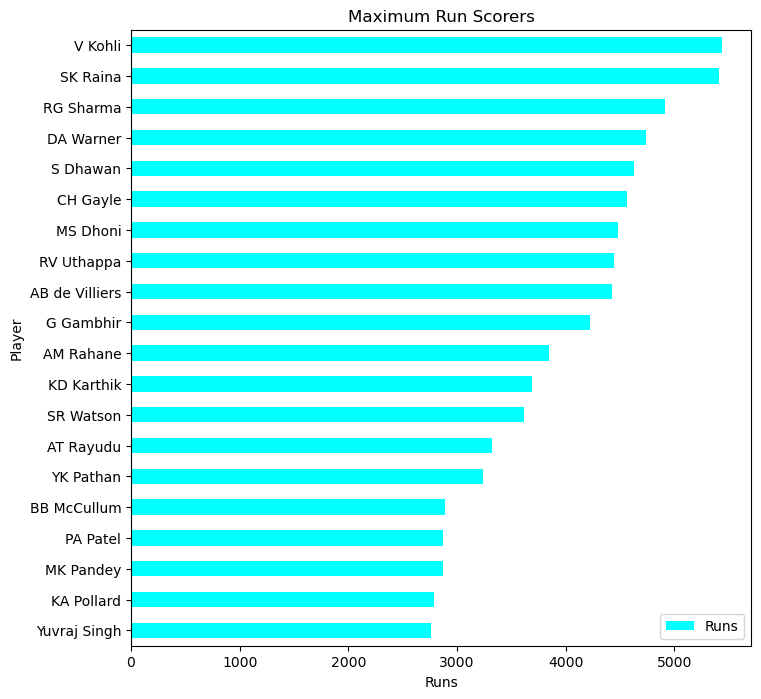

In [ ]:
#Top 20  Run scorers
runs.sort_values('Runs').sort_values('Runs',ascending=True).tail(20).plot(
    kind='barh',figsize=(8,8),color=["cyan"]
)
plt.xlabel('Runs')
plt.ylabel('Player')
plt.title('Maximum Run Scorers')
plt.show()

Observation: Virat Kohli and Suresh Raina are with the max scores

In [70]:
#Runs by Teams
team_runs=deliveries[deliveries['total_runs']>0]
team_runs=team_runs.groupby('batting_team')['total_runs'].agg([('runs','sum')])
team_runs.sort_values('runs',ascending=False)

,runs
batting_team,
Rising Pune Supergiant,1941.0
Sunrisers Hyderabad,1923.0
Mumbai Indians,1884.0
Gujarat Lions,1871.0
Kolkata Knight Riders,1853.0
Delhi Daredevils,1640.0
Kings XI Punjab,1548.0
Royal Challengers Bangalore,1526.0


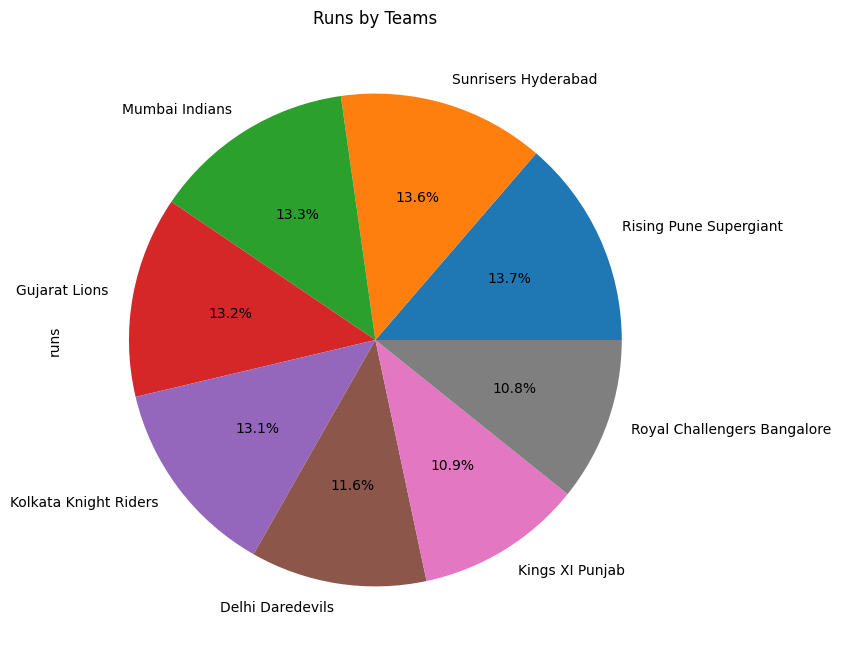

In [71]:
team_runs.sort_values('runs',ascending=False)['runs'].plot(
    kind='pie',figsize=[8,8],autopct='%0.1f%%'
)
plt.title('Runs by Teams')
plt.show()

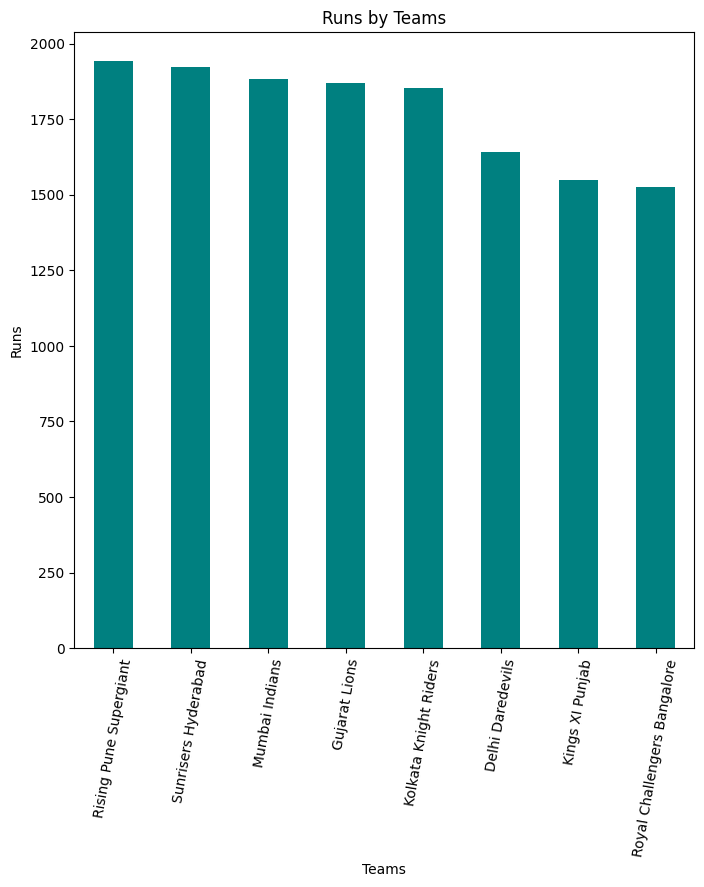

In [72]:
team_runs.sort_values('runs',ascending=False)['runs'].plot(
    kind='bar',figsize=(8,8),color=["teal"]
)
plt.title('Runs by Teams')
plt.xlabel('Teams')
plt.ylabel('Runs')
plt.xticks(rotation=80)
plt.show()

Observation: Mumbai Indians scored the max runs

* Dot Balls Analysis

In [73]:
#Dot balls Bowled by Teams
bowl_dots_team=deliveries[deliveries['total_runs']==0]
bowl_dots_team=bowl_dots_team.groupby('bowling_team')['total_runs'].agg([('dots','count')])
bowl_dots_team.sort_values('dots',ascending=False)

,dots
bowling_team,
Rising Pune Supergiant,504
Kolkata Knight Riders,439
Royal Challengers Bangalore,425
Sunrisers Hyderabad,424
Mumbai Indians,408
Delhi Daredevils,389
Gujarat Lions,376
Kings XI Punjab,375


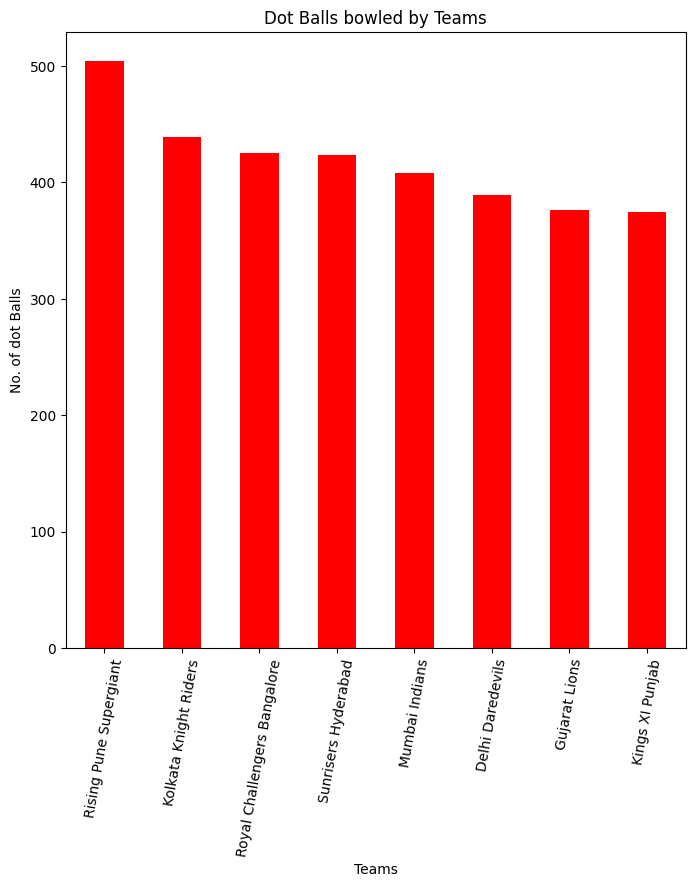

In [75]:
bowl_dots_team.sort_values('dots',ascending=False)['dots'].plot(
    kind='bar',figsize=(8,8),color=["red"]
)
plt.title('Dot Balls bowled by Teams')
plt.xlabel('Teams')
plt.ylabel('No. of dot Balls')
plt.xticks(rotation=80)
plt.show()

Observation: Mumbai Indians bowled max no. of dots balls

In [76]:
#Dot balls by Players
dots_bowl=deliveries[deliveries['batsman_runs']==0]
dots_data_bowl=dots_bowl.groupby('bowler')['batsman_runs'].agg([('dots','count')])
dots_data_bowl.sort_values('dots',ascending=False).head(20)

,dots
bowler,
B Kumar,115
MJ McClenaghan,108
Rashid Khan,105
BA Stokes,99
Imran Tahir,98
Sandeep Sharma,97
UT Yadav,91
JJ Bumrah,90
SP Narine,90


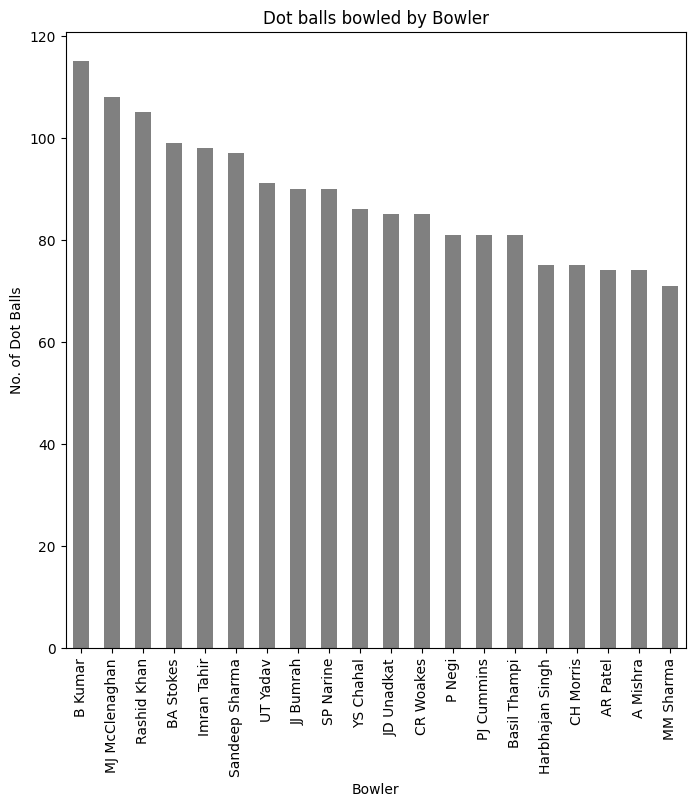

In [77]:
dots_data_bowl.sort_values('dots',ascending=False)['dots'].head(20).plot(kind='bar',figsize=(8,8),color=["gray"])
plt.xlabel('Bowler')
plt.ylabel('No. of Dot Balls')
plt.title('Dot balls bowled by Bowler')
plt.show()

Observation: Harbhajan Singh bowled max no. of dot balls

In [78]:
#Dot balls Faced by teams
team_dots=deliveries[deliveries['total_runs']==0]
team_dots=team_dots.groupby('batting_team')['total_runs'].agg([('dots','count')])
team_dots.sort_values('dots',ascending=False)

,dots
batting_team,
Royal Challengers Bangalore,499
Rising Pune Supergiant,460
Mumbai Indians,420
Gujarat Lions,409
Delhi Daredevils,401
Sunrisers Hyderabad,390
Kings XI Punjab,385
Kolkata Knight Riders,376


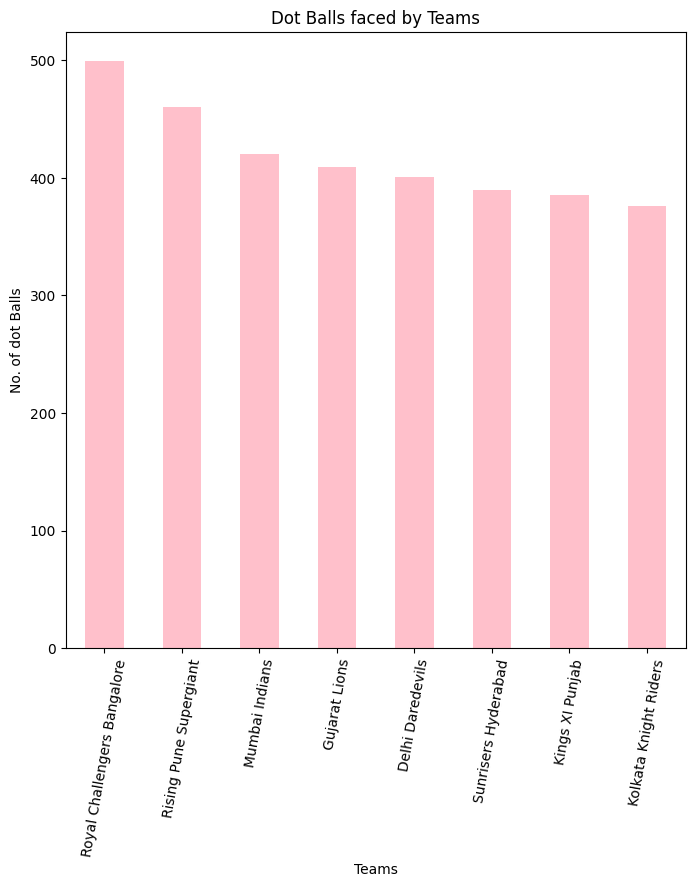

In [79]:
team_dots.sort_values('dots',ascending=False)['dots'].plot(
    kind='bar',figsize=(8,8),color=["pink"]
)
plt.title('Dot Balls faced by Teams')
plt.xlabel('Teams')
plt.ylabel('No. of dot Balls')
plt.xticks(rotation=80)
plt.show()

Observation: MUmbai Indians, RCB and KKR played max no. of dot balls

In [80]:
#Dot balls faced by batsman
dots_bat=deliveries[deliveries['batsman_runs']==0]
dots_data_bat=dots_bat.groupby('batsman')['batsman_runs'].agg([('dots','count')])
dots_data_bat.sort_values('dots',ascending=False)

,dots
batsman,
DA Warner,140
G Gambhir,111
S Dhawan,110
N Rana,99
SV Samson,94
...,...
AD Nath,1
MJ McClenaghan,1
IK Pathan,1


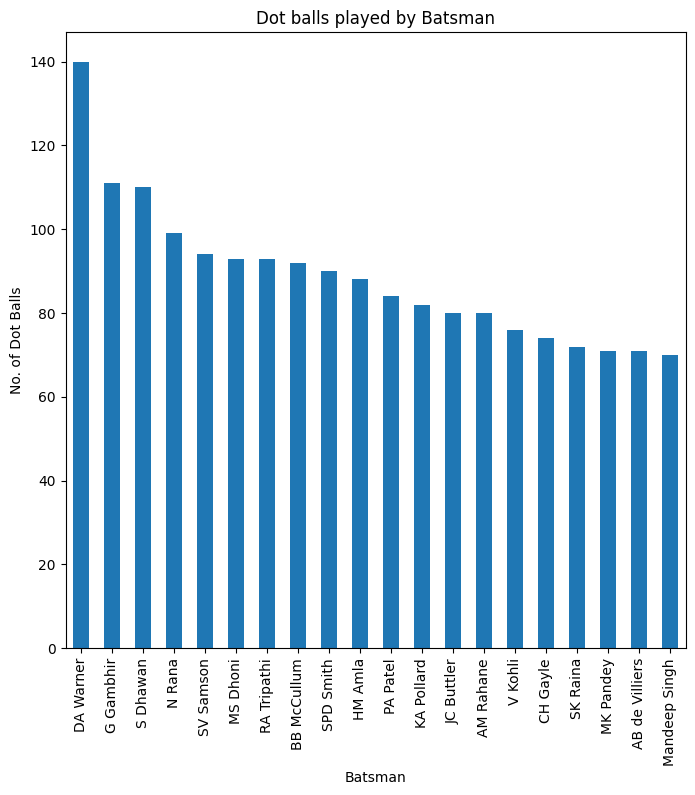

In [81]:
dots_data_bat.sort_values('dots',ascending=False)['dots'].head(20).plot(kind='bar',figsize=(8,8))
plt.xlabel('Batsman')
plt.ylabel('No. of Dot Balls')
plt.title('Dot balls played by Batsman')
plt.show()

Observation: Virat Kohli played max no. of dot balls

* Wickets Analysis

In [82]:
#Dissmisal Type
diss=deliveries['dismissal_kind']
diss.value_counts()

caught               305
bowled                99
run out               41
lbw                   41
caught and bowled     21
stumped               14
retired hurt           1
hit wicket             1
Name: dismissal_kind, dtype: int64

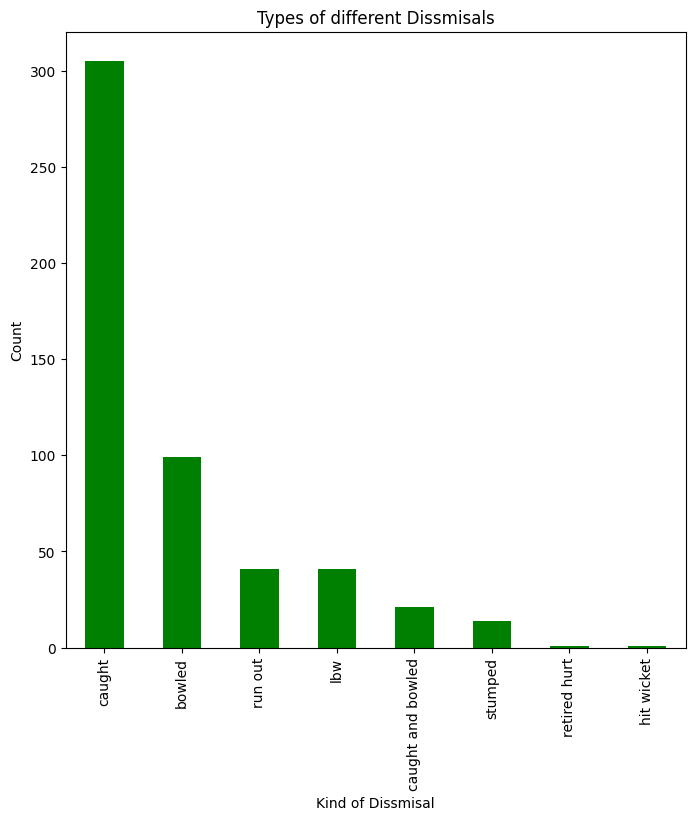

In [84]:
diss.value_counts().plot(kind='bar',figsize=[8,8],color=["green"])
plt.xlabel('Kind of Dissmisal')
plt.ylabel('Count')
plt.title("Types of different Dissmisals")
plt.show()

Observation: Max dissmisals are Caught

In [85]:
#Dissmisal by Teams
wicket_team=deliveries.groupby('bowling_team')['dismissal_kind'].agg(['count']).sort_values('count',ascending=False)
wicket_team

,count
bowling_team,
Rising Pune Supergiant,78
Sunrisers Hyderabad,76
Kolkata Knight Riders,68
Royal Challengers Bangalore,65
Mumbai Indians,62
Delhi Daredevils,61
Gujarat Lions,57
Kings XI Punjab,56
Mumbai,0


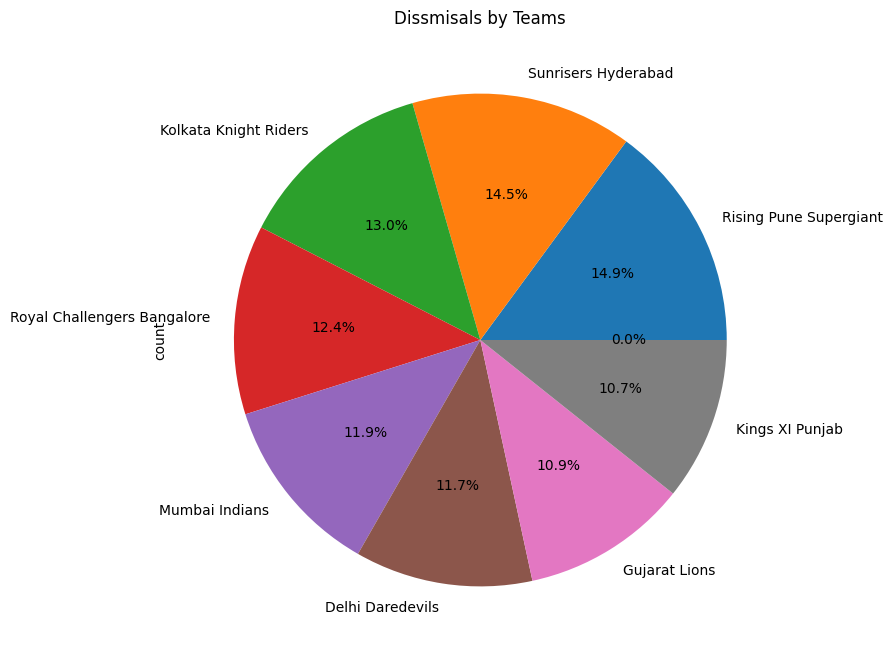

In [86]:
wicket_team['count'].plot(kind='pie',figsize=[8,8],autopct='%0.1f%%')
plt.title("Dissmisals by Teams")
plt.show()

Observation: Mumbai Indians took max no. of wickets (12.9%)

In [87]:
#Dissmisals by Bowlers
wicket_data=deliveries.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin([
    'run out','retired hurt','obstructing the field'
    ])]
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).sort_values('count',ascending=False)

,count
bowler,
B Kumar,21
Imran Tahir,18
JD Unadkat,17
MJ McClenaghan,16
Sandeep Sharma,14
...,...
SS Agarwal,1
DS Kulkarni,1
BCJ Cutting,1


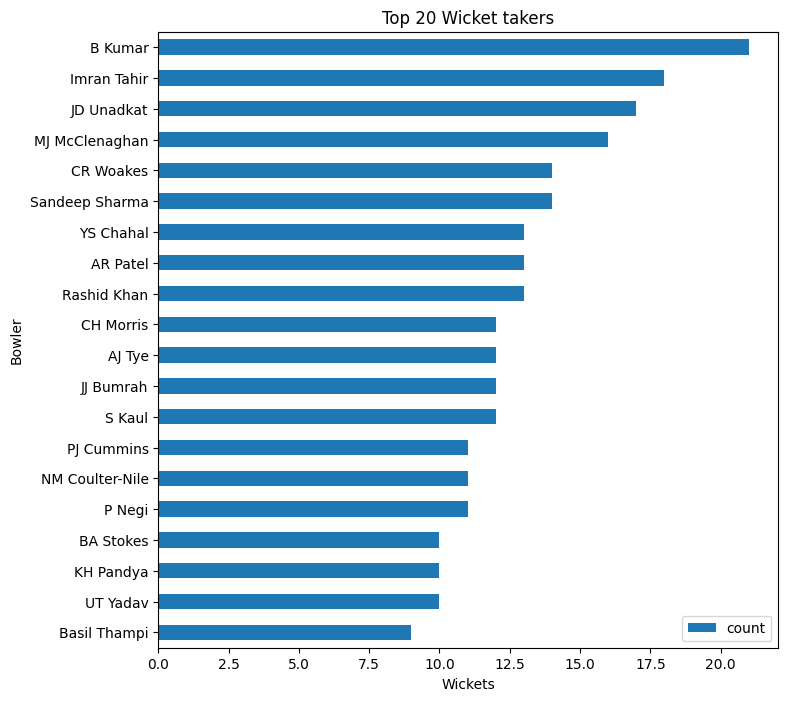

In [89]:
top_wicket_takers=wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).sort_values('count',ascending=True).tail(20)
top_wicket_takers.plot(kind='barh',figsize=(8,8))
plt.xlabel('Wickets')
plt.ylabel('Bowler')
plt.title("Top 20 Wicket takers")
plt.show()

Observation: Malinga took max no. of wickets (170)

Conclusions of Deliveries:
* Max Fours - Teams: Mumbai Indians and Kings XI Punjab,
             Player: Shikhar Dhawan
* Max Sixes - Teams: RCB and Mumbai Indians,
             Player: Gayle
* Max Runs - Teams: Mumbai Indians and RCB,
            Player: Virat Kohli and Suresh Raina
* Max Dot balls bowled - Team: Mumbai Indians,
                         Bowler: Harbhajan Singh
* Max Dot balls played - Team: Mumbai Indians,
                         Batsman: Virat Kohli
* Max Dissmisals are Caught kind
* Max Dissmisals - Team: Mumbai Indians (12.9%),
                     Bowler: Malinga (170)


Final Conclusion:
* Mumbai Indians and Chennai Super Kings most successful Teams
* Successful Players: Virat Kohli, Suresh Raina, Harbhajan Singh, Gayle, Malinga, AB de Villiers, MS Dhoni, RG Sharma and Shikhar Dhawan
* Winning toss plays an important role in winning the match
* Batting first won 337 matches and Fielding first won 406 matches, so Fielding first is important factor